In [9]:
from cana.drawing.schema_vis import plot_schemata
from cana.drawing.plot_look_up_table import plot_look_up_table
from automata.automata_rules import automata_output_list, autoschemata
from automata.schema_search_tools import (
    annihilation_generation_rules,
    maintenance_rules,
    # plot_hist,
    # plot_scatter,
    collect_data_from_generator,
    min_max_and_parent_rule_values,
    shuffle_and_generate,
    shuffle_wildcards_in_schemata,
)

from cana.boolean_node import BooleanNode
import pandas as pd
import random
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor

## automata binary

In [10]:
automata = {
    "GKL_BIN": 0b00000000_01011111_00000000_01011111_00000000_01011111_00000000_01011111_00000000_01011111_11111111_01011111_00000000_01011111_11111111_01011111,
    "GKL_STR": "!x_{c}&x_{l1}&x_{l3} | x_{r3}&x_{c} | x_{r1}&x_{c}",
    "GP_BIN": 0b00000101_00000000_01010101_00000101_00000101_00000000_01010101_00000101_01010101_11111111_01010101_11111111_01010101_11111111_01010101_11111111,
    "GP_STR": "x_{r3}&x_{r1}&!x_{c} | x_{r3}&x_{r1}&x_{l1} | x_{r3}&!x_{c}&x_{l1} | x_{r3}&x_{l3} | x_{c}&x_{l3}",
    "GEP_1_BIN": 0b00010001_00000000_01010101_00000000_00010001_00001111_01010101_00001111_00010001_11111111_01010101_11111111_00010001_11111111_01010101_11111111,
    "GEP_1_STR": "x_{r3}&x_{r2}&!x_{c} | x_{r3}&!x_{c}&x_{l1} | x_{r1}&x_{c}&x_{l2} | x_{c}&x_{l3}",
    "GEP_2_BIN": 0b00000000_01010101_00000000_01110111_00000000_01010101_00000000_01110111_00001111_01010101_00001111_01110111_11111111_01010101_11111111_01110111,
    "GEP_2_STR": "x_{r2}&x_{c}&x_{l1} | x_{r1}&!x_{c}&x_{l3} | !x_{c}&x_{l2}&x_{l3} | x_{r3}&x_{c}",
    "Das_BIN": 0b00000111_00000000_00000111_11111111_00001111_00000000_00001111_11111111_00001111_00000000_00000111_11111111_00001111_00110001_00001111_11111111,
    "Das_STR": "x_{r3}&x_{r2}&x_{r1}&x_{l2}&x_{l3} | x_{r2}&!x_{r1}&x_{c}&x_{l2}&x_{l3} | x_{r1}&!x_{c}&!x_{l1}&x_{l3} | x_{r3}&x_{r1}&!x_{c} | x_{r2}&x_{r1}&!x_{c} | x_{r1}&!x_{c}&x_{l2} | x_{c}&x_{l1}",
    "Davis_BIN": 0b00000000_00101111_00000011_01011111_00000000_00011111_11001111_00011111_00000000_00101111_11111100_01011111_00000000_00011111_11111111_00011111,
    "Davis_STR": "!x_{r3}&x_{r2}&x_{c}&!x_{l1}&!x_{l2} | x_{r3}&x_{c}&x_{l1}&!x_{l2} | x_{r3}&x_{r2}&x_{c}&x_{l2} | !x_{r2}&!x_{c}&x_{l1}&x_{l2} | x_{r2}&x_{r1}&x_{l1}&!x_{l3} | !x_{r2}&x_{r1}&x_{l1}&x_{l3} | !x_{r1}&!x_{c}&x_{l1}&x_{l3} | x_{r1}&x_{l1}&x_{l2} | x_{r1}&x_{c}",
    "ABK_BIN": 0b00000101_00000000_01010101_00000101_00000101_00000000_01010101_00000101_01010101_11111111_01010101_11111111_01010101_11111111_01010101_11111111,
    "ABK_STR": "x_{r3}&x_{r1}&!x_{c} | x_{r3}&x_{r1}&x_{l1} | x_{r3}&!x_{c}&x_{l1} | x_{r3}&x_{l3} | x_{c}&x_{l3}",
    "DMC_BIN": 0b00000101_00000100_00000101_10000111_00000101_00000000_00001111_01110111_00000011_01110111_01010101_10000011_01111011_11111111_10110111_01111111,
    "DMC_STR": "!x_{r3}&!x_{r2}&!x_{r1}&x_{c}&x_{l1}&!x_{l2} | !x_{r3}&!x_{r1}&!x_{c}&x_{l1}&x_{l2}&x_{l3} | x_{r3}&!x_{r2}&x_{r1}&!x_{l2}&!x_{l3} | x_{r1}&!x_{c}&x_{l1}&x_{l2}&!x_{l3} | x_{r3}&!x_{c}&x_{l1}&!x_{l2}&x_{l3} | x_{r3}&!x_{r1}&!x_{l1}&x_{l2}&x_{l3} | !x_{r3}&x_{r1}&!x_{l1}&x_{l2}&x_{l3} | x_{r2}&x_{r1}&x_{c}&x_{l1} | x_{r3}&x_{r1}&x_{l1}&x_{l2} | x_{r3}&x_{c}&x_{l1}&x_{l2} | x_{r2}&x_{c}&x_{l1}&x_{l2} | x_{r3}&x_{r1}&!x_{c}&!x_{l3} | x_{r2}&x_{r1}&!x_{l1}&x_{l3} | x_{r3}&x_{c}&!x_{l1}&x_{l3} | x_{r2}&x_{c}&!x_{l1}&x_{l3} | x_{r1}&x_{c}&x_{l2}&x_{l3} | x_{c}&!x_{l1}&x_{l2}&x_{l3} | x_{r2}&x_{l2}&x_{l3}",
    "COE_1_BIN": 0b00000001_00010100_00110000_11010111_00010001_00001111_00111001_01010111_00000101_10110100_11111111_00010111_11110001_01111101_11111001_01010111,
    "COE_1_STR": "!x_{r3}&!x_{r2}&x_{r1}&!x_{c}&x_{l1}&x_{l2} | !x_{r2}&!x_{r1}&x_{c}&x_{l1}&!x_{l2}&!x_{l3} | !x_{r3}&!x_{r1}&x_{c}&!x_{l1}&!x_{l2}&x_{l3} | x_{r3}&x_{r2}&x_{r1}&!x_{c}&!x_{l1} | x_{r3}&x_{r2}&!x_{r1}&x_{c}&!x_{l2} | !x_{r2}&x_{r1}&x_{c}&!x_{l1}&x_{l2} | x_{r2}&x_{r1}&x_{c}&x_{l2}&!x_{l3} | x_{r2}&!x_{r1}&x_{c}&!x_{l1}&x_{l3} | x_{r3}&!x_{r2}&x_{r1}&!x_{l2}&x_{l3} | x_{r3}&!x_{r2}&x_{r1}&x_{c} | x_{r2}&!x_{r1}&!x_{c}&x_{l1} | x_{r2}&x_{r1}&x_{c}&x_{l1} | x_{r3}&x_{r2}&!x_{c}&x_{l2} | x_{r3}&x_{c}&x_{l1}&x_{l2} | !x_{c}&x_{l1}&!x_{l2}&x_{l3} | !x_{r1}&!x_{c}&x_{l2}&x_{l3} | x_{r3}&x_{c}&x_{l2}&x_{l3}",
    "COE_2_BIN": 0b00010100_01010001_00110000_01011100_00000000_01010000_11001110_01011111_00010111_00010001_11111111_01011111_00001111_01010011_11001111_01011111,
    "COE_2_STR": "x_{r3}&!x_{r2}&x_{r1}&!x_{c}&!x_{l1}&!x_{l2} | x_{r3}&x_{r2}&x_{c}&!x_{l1}&!x_{l2} | x_{r2}&!x_{r1}&!x_{c}&x_{l1}&!x_{l2} | !x_{r2}&x_{r1}&x_{c}&x_{l1} | x_{r3}&x_{r2}&!x_{r1}&!x_{l2} | x_{r3}&!x_{r1}&x_{c}&x_{l2} | !x_{r3}&x_{r1}&x_{l1}&x_{l2} | !x_{r2}&!x_{c}&x_{l1}&x_{l2} | x_{r3}&x_{c}&x_{l1}&x_{l2} | x_{r3}&!x_{r1}&x_{c}&!x_{l3} | x_{r2}&x_{r1}&!x_{c}&x_{l3} | !x_{r2}&!x_{c}&x_{l1}&x_{l3} | x_{r3}&x_{c}&x_{l1}&x_{l3} | x_{r2}&x_{r1}&x_{l2}&x_{l3} | x_{r1}&!x_{c}&x_{l2}&x_{l3} | x_{r1}&x_{l1}&x_{l3}",
    "MM401_BIN": 0b11111111_10101010_11111111_10101000_11111111_10101010_11111111_10101000_11110000_10101010_00000000_10101000_00000000_10101010_00000000_10101000,
    "MM401_STR": "!x_{r1}&!x_{c}&!x_{l1}&!x_{l2} | !x_{r3}&!x_{r2}&x_{c} | !x_{r3}&!x_{r1}&x_{c} | !x_{r3}&x_{c}&!x_{l1} | !x_{c}&!x_{l3}",
}

# output_dict = {}
# # convert this into a list of outputs
# for item in automata:
#     if item[-3:] == 'BIN':
#         outputlist = [str(x) for x in bin(automata[item])[2:].zfill(128)]
#         output_dict[item] = outputlist
# print(output_dict)

## automata schemata

In [11]:
node = BooleanNode.from_output_list(automata_output_list["GEP_1"])
# plot_schemata(node)

## finding the annihilation and generation rules of a lookup table

This function detects all the annihilation rules (where the state of the automata changes from 1 to 0),
and all the generation rules (0 to 1) of a given wildcard ('#') schemata.  

Filtering these rules directly from wildcard schemata isn't a straightforward process. This function detects it from the output list. It involves removal of annihilation/generation redundancies hidden in the schemata. 

In [12]:
for item in automata_output_list:
    rules = annihilation_generation_rules(automata_output_list[item])
    print(f"{item}: {rules}\n")

GKL: [['###10#0', 0], ['1#10###', 1]]

GP: [['0#01###', 0], ['0##1##0', 0], ['0##10##', 0], ['##10##1', 1], ['###01#1', 1], ['1##0##1', 1]]

GEP_1: [['0##10##', 0], ['00#1###', 0], ['###0#11', 1], ['##10##1', 1]]

GEP_2: [['##01##0', 0], ['###1#00', 0], ['11#0###', 1], ['1##01##', 1]]

Das: [['#001###', 0], ['0#01###', 0], ['##01#0#', 0], ['##011#0', 0], ['1#001##', 1], ['###011#', 1], ['###01#1', 1], ['#1#01##', 1]]

Davis: [['##110#0', 0], ['#1#100#', 0], ['#0010#1', 0], ['#1#10#0', 0], ['##0100#', 0], ['###1000', 0], ['1#100##', 1], ['#110#0#', 1], ['1110###', 1], ['0#1011#', 1], ['#1101##', 1], ['1#10#0#', 1]]

ABK: [['0#01###', 0], ['0##1##0', 0], ['0##10##', 0], ['##10##1', 1], ['###01#1', 1], ['1##0##1', 1]]

DMC: [['0##1100', 0], ['0#010##', 0], ['1011#01', 0], ['0#01#1#', 0], ['0#01##0', 0], ['#001#00', 0], ['00#101#', 0], ['0101###', 0], ['00#10#1', 0], ['#0#1100', 0], ['#111000', 0], ['01#1#00', 0], ['101110#', 0], ['#01101#', 0], ['#0110#1', 0], ['###0111', 1], ['11#0#1#', 

### Annihilation_generation_rules

used jordan's algorithm and verified with the annihilation generation rules shown in [1].


[1] M. Marques, R. Manurung, and H. Pain, “Conceptual Representations: What do they have to say about the Density Classiﬁcation Task by Cellular Automata?”.


In [13]:
annihilation_generation = {  # keeping annihilation and generation rules only
    "GKL": [["###10#0", 0], ["1#10###", 1]],
    "GP": [
        ["0##1##0", 0],
        ["0##10##", 0],
        ["0#01###", 0],
        ["##10##1", 1],
        ["1##0##1", 1],
        ["###01#1", 1],
    ],
    "GEP_1": [["00#1###", 0], ["0##10##", 0], ["##10##1", 1], ["###0#11", 1]],
    "GEP_2": [["###1#00", 0], ["##01##0", 0], ["1##01##", 1], ["11#0###", 1]],
    "Das": [
        ["##01#0#", 0],
        ["#001###", 0],
        ["##011#0", 0],
        ["0#01###", 0],
        ["###011#", 1],
        ["#1#01##", 1],
        ["1#001##", 1],
        ["###01#1", 1],
    ],
    "Davis": [
        ["##0100#", 0],
        ["#1#100#", 0],
        ["#1#10#0", 0],
        ["##110#0", 0],
        ["###1000", 0],
        ["#0010#1", 0],
        ["#110#0#", 1],
        ["1110###", 1],
        ["0#1011#", 1],
        ["1#100##", 1],
        ["1#10#0#", 1],
        ["#1101##", 1],
    ],
    "ABK": [
        ["0##1##0", 0],
        ["0##10##", 0],
        ["0#01###", 0],
        ["##10##1", 1],
        ["1##0##1", 1],
        ["###01#1", 1],
    ],
    "DMC": [
        ["#111000", 0],
        ["#0#1100", 0],
        ["00#101#", 0],
        ["0101###", 0],
        ["00#10#1", 0],
        ["#0110#1", 0],
        ["#01101#", 0],
        ["01#1#00", 0],
        ["101110#", 0],
        ["0#010##", 0],
        ["0#01#1#", 0],
        ["1011#01", 0],
        ["0##1100", 0],
        ["0#01##0", 0],
        ["#001#00", 0],
        ["##101#1", 1],
        ["1#10#11", 1],
        ["0##01#1", 1],
        ["11100#0", 1],
        ["01101##", 1],
        ["1#0011#", 1],
        ["###0111", 1],
        ["11#0#1#", 1],
        ["11000#1", 1],
        ["#11011#", 1],
        ["11001#0", 1],
        ["1010##1", 1],
    ],
    "COE_1": [
        ["#00111#", 0],
        ["##11010", 0],
        ["01010##", 0],
        ["#001001", 0],
        ["1#110#0", 0],
        ["#1#1000", 0],
        ["101100#", 0],
        ["#0011#0", 0],
        ["1#11#00", 0],
        ["##11100", 0],
        ["01#10#0", 0],
        ["#1110#0", 0],
        ["#0#1100", 0],
        ["0#010#0", 0],
        ["0##1010", 0],
        ["0001##0", 0],
        ["10#1001", 0],
        ["#111#00", 0],
        ["0#0100#", 0],
        ["1#01110", 0],
        ["1#10#11", 1],
        ["1##0111", 1],
        ["1010###", 1],
        ["##00111", 1],
        ["#110100", 1],
        ["1#100##", 1],
        ["11#00##", 1],
        ["#1#0#11", 1],
        ["10#01#1", 1],
        ["1#10#00", 1],
        ["##1001#", 1],
    ],
    "COE_2": [
        ["00#1#10", 0],
        ["01011##", 0],
        ["###10#0", 0],
        ["##01#00", 0],
        ["##0110#", 0],
        ["001111#", 0],
        ["#001##0", 0],
        ["1001#0#", 0],
        ["0#01##0", 0],
        ["#110#0#", 1],
        ["#01001#", 1],
        ["#0#0011", 1],
        ["1010###", 1],
        ["1#101##", 1],
        ["1##011#", 1],
        ["11#01##", 1],
        ["#000101", 1],
        ["1##01#1", 1],
        ["10#0#11", 1],
        ["1#10#0#", 1],
        ["#1101#0", 1],
    ],
    "MM401": [["###1##1", 0], ["##1111#", 0], ["#0000##", 1], ["0##0###", 1]],
}

## Maintenance rules
We have a function that detects annihilation and generation rules in a given schemata. Now we detect the remaining maintenance rules. 

In [14]:
anni_gen = {}
maintenance = {}
for item in automata_output_list:
    anni_gen[item] = annihilation_generation_rules(automata_output_list[item])
    maintenance[item] = maintenance_rules(automata_output_list[item])

    # let's verify that the annihilation and generation rules combined with maintenance rules return the original rule
    combo = []
    combo = anni_gen[item] + maintenance[item]
    combo_node = BooleanNode.from_partial_lut(combo)
    parent_node = BooleanNode.from_output_list(automata_output_list[item])

    assert (
        combo_node.outputs == parent_node.outputs
    ), "Maintenance rules combined with annihilation and generation rules do not return the original rule. "

    print(f"\n{item} : \n{maintenance[item]}")


GKL : 
[['0###0#0', 0], ['0##0###', 0], ['##0#0#0', 0], ['##00###', 0], ['1#1#1##', 1], ['1#1###1', 1], ['###11##', 1], ['###1##1', 1]]

GP : 
[['###0##0', 0], ['0#0#0##', 0], ['1##1###', 1], ['##1#1#1', 1], ['0##0##0', 0], ['1##1##1', 1]]

GEP_1 : 
[['##00#0#', 0], ['0###0#0', 0], ['###0##0', 0], ['00####0', 0], ['000##0#', 0], ['0#0#00#', 0], ['1##1###', 1], ['#11#1#1', 1], ['1####11', 1], ['#1#11##', 1], ['#1##111', 1], ['1#1###1', 1]]

GEP_2 : 
[['#0##000', 0], ['#0#00##', 0], ['0####00', 0], ['#00#0#0', 0], ['0#0###0', 0], ['0##0###', 0], ['1#1#11#', 1], ['###1##1', 1], ['111##1#', 1], ['##11#1#', 1], ['1###1#1', 1], ['11####1', 1]]

Das : 
[['###00##', 0], ['#010#00', 0], ['000##00', 0], ['#00#0##', 0], ['0#0#0##', 0], ['00#0#00', 0], ['##0#00#', 0], ['11#101#', 1], ['##1#11#', 1], ['11##111', 1], ['11#1#11', 1], ['##1#1#1', 1], ['##11###', 1], ['#11#1##', 1]]

Davis : 
[['001#0#0', 0], ['0#1#010', 0], ['0##001#', 0], ['00##000', 0], ['10#011#', 0], ['00#00##', 0], ['01##010', 0

## generating LUTs from annihilation generation rules from given criteria

In [15]:
node = BooleanNode.from_partial_lut(annihilation_generation["GKL"])
print("".join(node.outputs))


# from a given bias criterion
nodes_from_bias = node.generate_with_required_bias(bias=0.5, verbose=True)

# from a given effective connectivity criterion
nodes_from_ec = node.generate_with_required_effective_connectivity(
    effective_connectivity=0.375, shuffle=True, verbose=True
)

nodes_randomly = node.fill_missing_output_randomly()

????????0?0?????????????0?0?????????????0?0?????????????0?0?????????????0?0?????111111110?0?????????????0?0?????111111110?0?????
6.44e+27 possible permutation(s) with a bias of 0.5. This is the closest bias less than or equal to the required bias of 0.5.
No. of '?' in output = 96.
Returning a generator of nodes with effective connectivity within 0.01 of 0.375.


# plotting

In [ ]:

def plot_hist(
    generated_node_values,
    value_type=None,
    no_of_columns=4,
    title=None,
    save=False,
    filename=None,
    include_parent=False,
) -> None:
    """
    Plot histogram of generated node values.

    Args:
    generated_node_values (dict): Dictionary of generated node values.
    value_type (str): Type of value to plot. Must be 'ke' or 'bias'.
    no_of_columns (int): Number of columns in the plot.

    Returns:
    None

    Example:
    generated_node_values = {
        "Rule 1": [0.1, 0.2, 0.3, 0.4, 0.5],
        "Rule 2": [0.2, 0.3, 0.4, 0.5, 0.6],
    }
    plot_hist(generated_node_values, value_type='ke')
    """

    if value_type == "ke":
        parent_rule_label = "Parent Rule $K_e$"
        xlabel = "Effective Connectivity"
        ylabel = "Count"
    elif value_type == "bias":
        parent_rule_label = "Parent Rule Bias"
        xlabel = "Bias"
        ylabel = "Count"
    elif type(value_type) is not str and value_type not in ["ke", "bias"]:
        xlabel = value_type
        ylabel = "Count"
    else:
        raise ValueError("Invalid value_type. Must be 'ke' or 'bias'.")
    if title is None:
        title = f"Distribution of Generated {value_type.capitalize()} Values"

    total_plots = len(generated_node_values)
    no_of_rows = int((total_plots / no_of_columns) + 1)
    # plot hist ke in subplots
    fig, axs = plt.subplots(no_of_rows, no_of_columns, figsize=(25, 15))
    fig.suptitle(
        title,
        fontsize=25,
    )
    min_max, parent_rule_values = min_max_and_parent_rule_values(
        automata_output_list,
        generated_node_values,
        value_type=value_type,
        include_parent=include_parent,
    )
    for i, rule in enumerate(generated_node_values):
        ax = axs.flatten()[i]
        # make each subplot axes equal in value range
        ax.set_xlim(min_max)
        # ax.set_ylim(0, max_count)

        ax.hist(generated_node_values[rule], bins=100, color="blue", alpha=0.7)
        ax.set_title(rule, fontsize=20)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.text(
            0.2,
            0.9,
            f"Total Count: {len(generated_node_values[rule])}",
            horizontalalignment="center",
            verticalalignment="center",
            transform=ax.transAxes,
            fontsize=10,
        )

        if parent_rule_values and parent_rule_label:
            # plot parent rule value as a line
            ax.axvline(
                parent_rule_values[rule],
                color="red",
                linestyle="--",
                label=f"{parent_rule_label}: {parent_rule_values[rule]:.2f}",
            )
            # ax.text(
            #     parent_rule_values[rule],
            #     .5,
            #     f"{parent_rule_values[rule]:.2f}",
            #     rotation=90,
            #     fontsize=10,
            # )

            ax.legend(fontsize="large", loc="upper right")

    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    if save:
        plt.savefig(filename)
    plt.show()


def plot_scatter(
    first_values,
    second_values,
    label: list[str, str] = ["ke", "bias"],
    no_of_columns=4,
    title=None,
    save=False,
    filename=None,
    include_parent=False,
) -> None:
    """
    Plot scatter plot of generated rules.

    Args:
    first_values (dict): Dictionary of first values.
    second_values (dict): Dictionary of second values.
    label (list): List of labels. Must be 'ke' or 'bias'.
    no_of_columns (int): Number of columns in the plot.

    Returns:
    None

    Example:
    first_values = {
        "Rule 1": [0.1, 0.2, 0.3, 0.4, 0.5],
        "Rule 2": [0.2, 0.3, 0.4, 0.5, 0.6],
    }
    second_values = {
        "Rule 1": [0.2, 0.3, 0.4, 0.5, 0.6],
        "Rule 2": [0.3, 0.4, 0.5, 0.6, 0.7],
    }
    plot_scatter(first_values, second_values, label=['ke', 'bias'])
    """
    if label[0] == label[1]:
        raise ValueError("Invalid labels. Must be different.")
    if label[0] == "ke":
        xlabel = "$K_e$"
        if label[1] == "bias":
            ylabel = "Bias"

    elif label[0] == "bias":
        xlabel = "Bias"
        if label[1] == "ke":
            ylabel = "$K_e$"
    else:
        raise ValueError("Invalid labels. Must be 'ke' or 'bias'.")

    if title is None:
        title = f"Scatter plot of {xlabel} and {ylabel} of generated rules."

    total_plots = len(first_values)
    no_of_rows = (
        int((total_plots / no_of_columns) + 1) if total_plots > no_of_columns else 1
    )

    fig, axs = plt.subplots(no_of_rows, no_of_columns, figsize=(25, 15))
    fig.suptitle(
        title,
        fontsize=25,
    )
    min_max_x, parent_rule_values_x = min_max_and_parent_rule_values(
        automata_output_list,
        first_values,
        value_type=label[0],
        include_parent=include_parent,
    )
    min_max_y, parent_rule_values_y = min_max_and_parent_rule_values(
        automata_output_list,
        second_values,
        value_type=label[1],
        include_parent=include_parent,
    )
    # plot scatter if first value and second value for
    rules = list(first_values.keys())
    for i, rule in enumerate(rules):
        ax = axs[int(i / no_of_columns), i % no_of_columns]  # TODO: [SRI] Fix the indexing

        ax.scatter(
            first_values[rule],
            second_values[rule],
            label=f"Rule {rule}",
            alpha=0.5,
        )

        ax.set_title(f"Rule {rule}")
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.grid()
        ax.set_xlim(min_max_x)
        ax.set_ylim(min_max_y)

        # plot parent rule values
        ax.scatter(parent_rule_values_x[rule], parent_rule_values_y[rule], c="red")
        ax.legend()

    for i in range(total_plots, no_of_columns * no_of_rows):
        fig.delaxes(axs[int(i / no_of_columns), i % no_of_columns])
    plt.tight_layout()
    if save:
        plt.savefig(filename)
    plt.show()

### $K_e$ and Bias in generated rules

#### Plotting $K_e$ and Bias in generated rules from anni_gen rules with missing outputs filled randomly

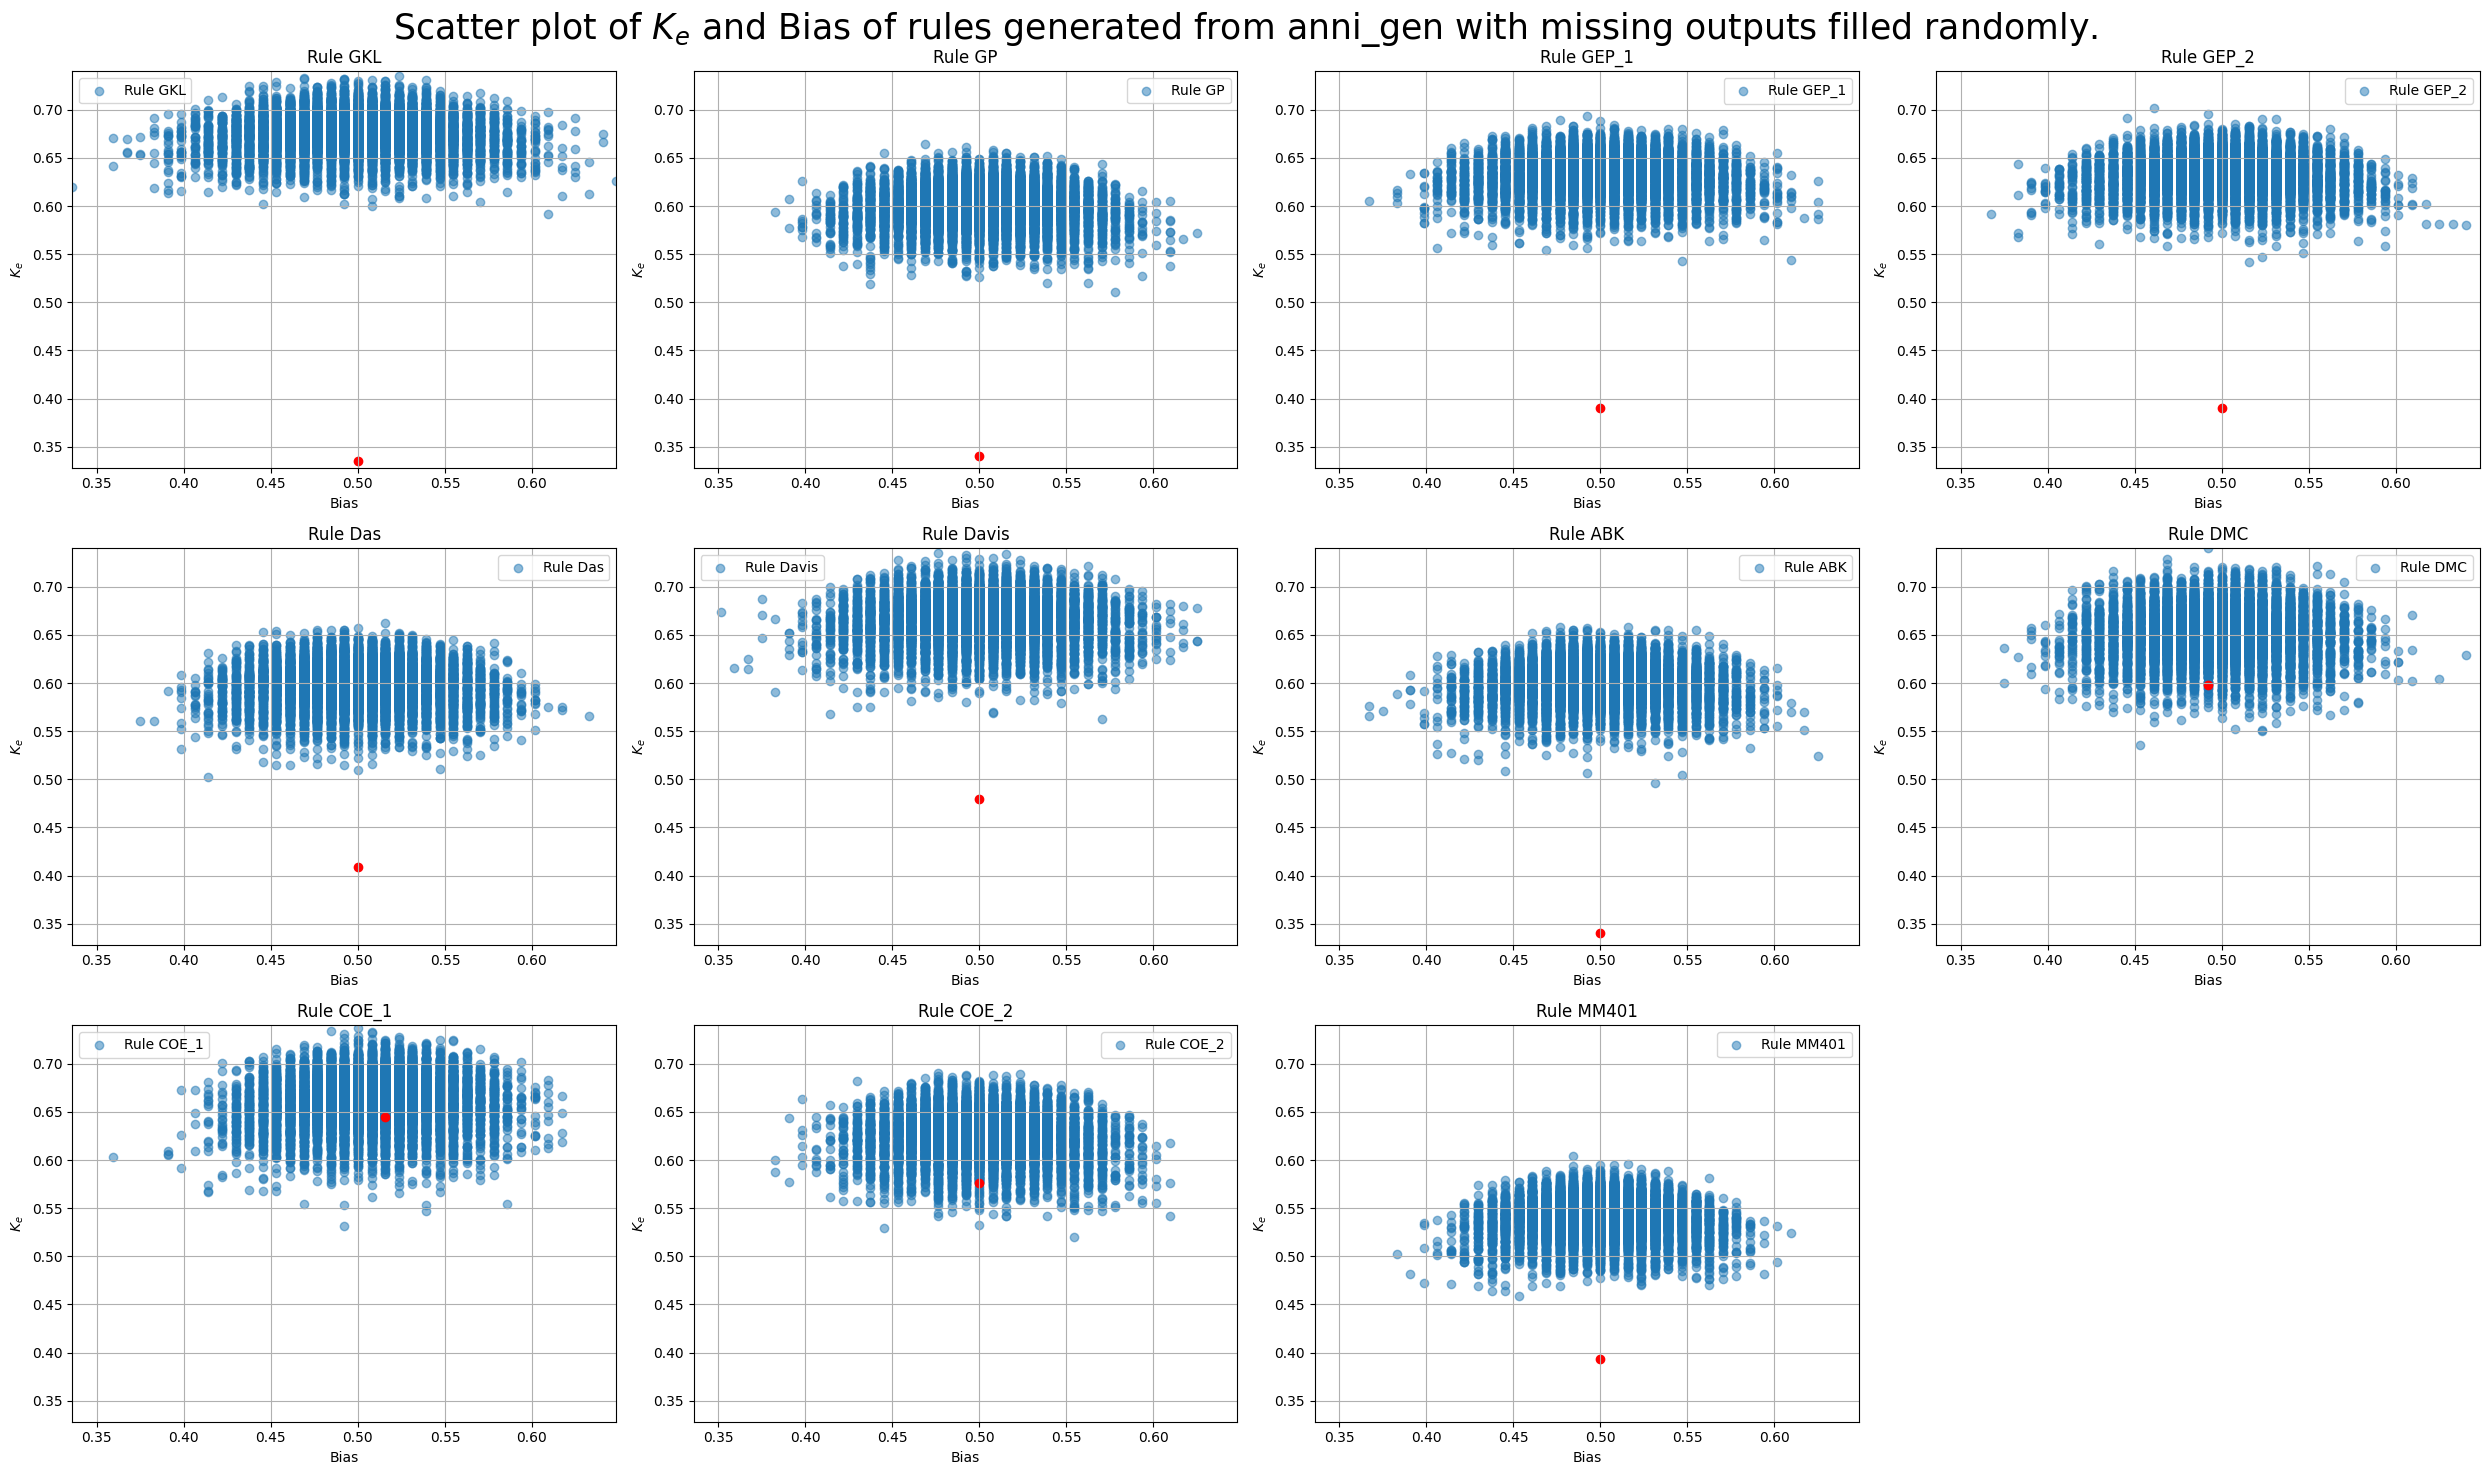

In [ ]:
rules = (
    "GKL",
    "GP",
    "GEP_1",
    "GEP_2",
    "Das",
    "Davis",
    "ABK",
    "DMC",
    "COE_1",
    "COE_2",
    "MM401",
)


generated_nodes = {}
limit = 10000
shuffle = "maintenance"
save = False


# parallelize the loop
def worker(item):
    """
    Worker function to be executed by each process.
    """
    node = BooleanNode.from_partial_lut(annihilation_generation[item])
    generator = node.fill_missing_output_randomly()

    return item, collect_data_from_generator(generator, limit=limit)


# Use ProcessPoolExecutor to parallelize the loop
with ProcessPoolExecutor() as executor:
    results = executor.map(worker, rules)

# Process results
for item, (nodes, bias, ke, count) in results:
    generated_nodes[item] = {"nodes": nodes, "bias": bias, "ke": ke, "count": count}


title = "Scatter plot of $K_e$ and Bias of rules generated from anni_gen with missing outputs filled randomly."
filename = "Scatter plot of $K_e$ and Bias of rules generated from anni_gen with missing outputs filled randomly.png"
plot_scatter(
    first_values={k: v["bias"] for k, v in generated_nodes.items()},
    second_values={k: v["ke"] for k, v in generated_nodes.items()},
    label=["bias", "ke"],
    no_of_columns=4,
    title=title,
    save=save,
    filename=filename,
)

#### Plotting $K_e$ in generated rules from anni_gen rules with with parent rule bias 

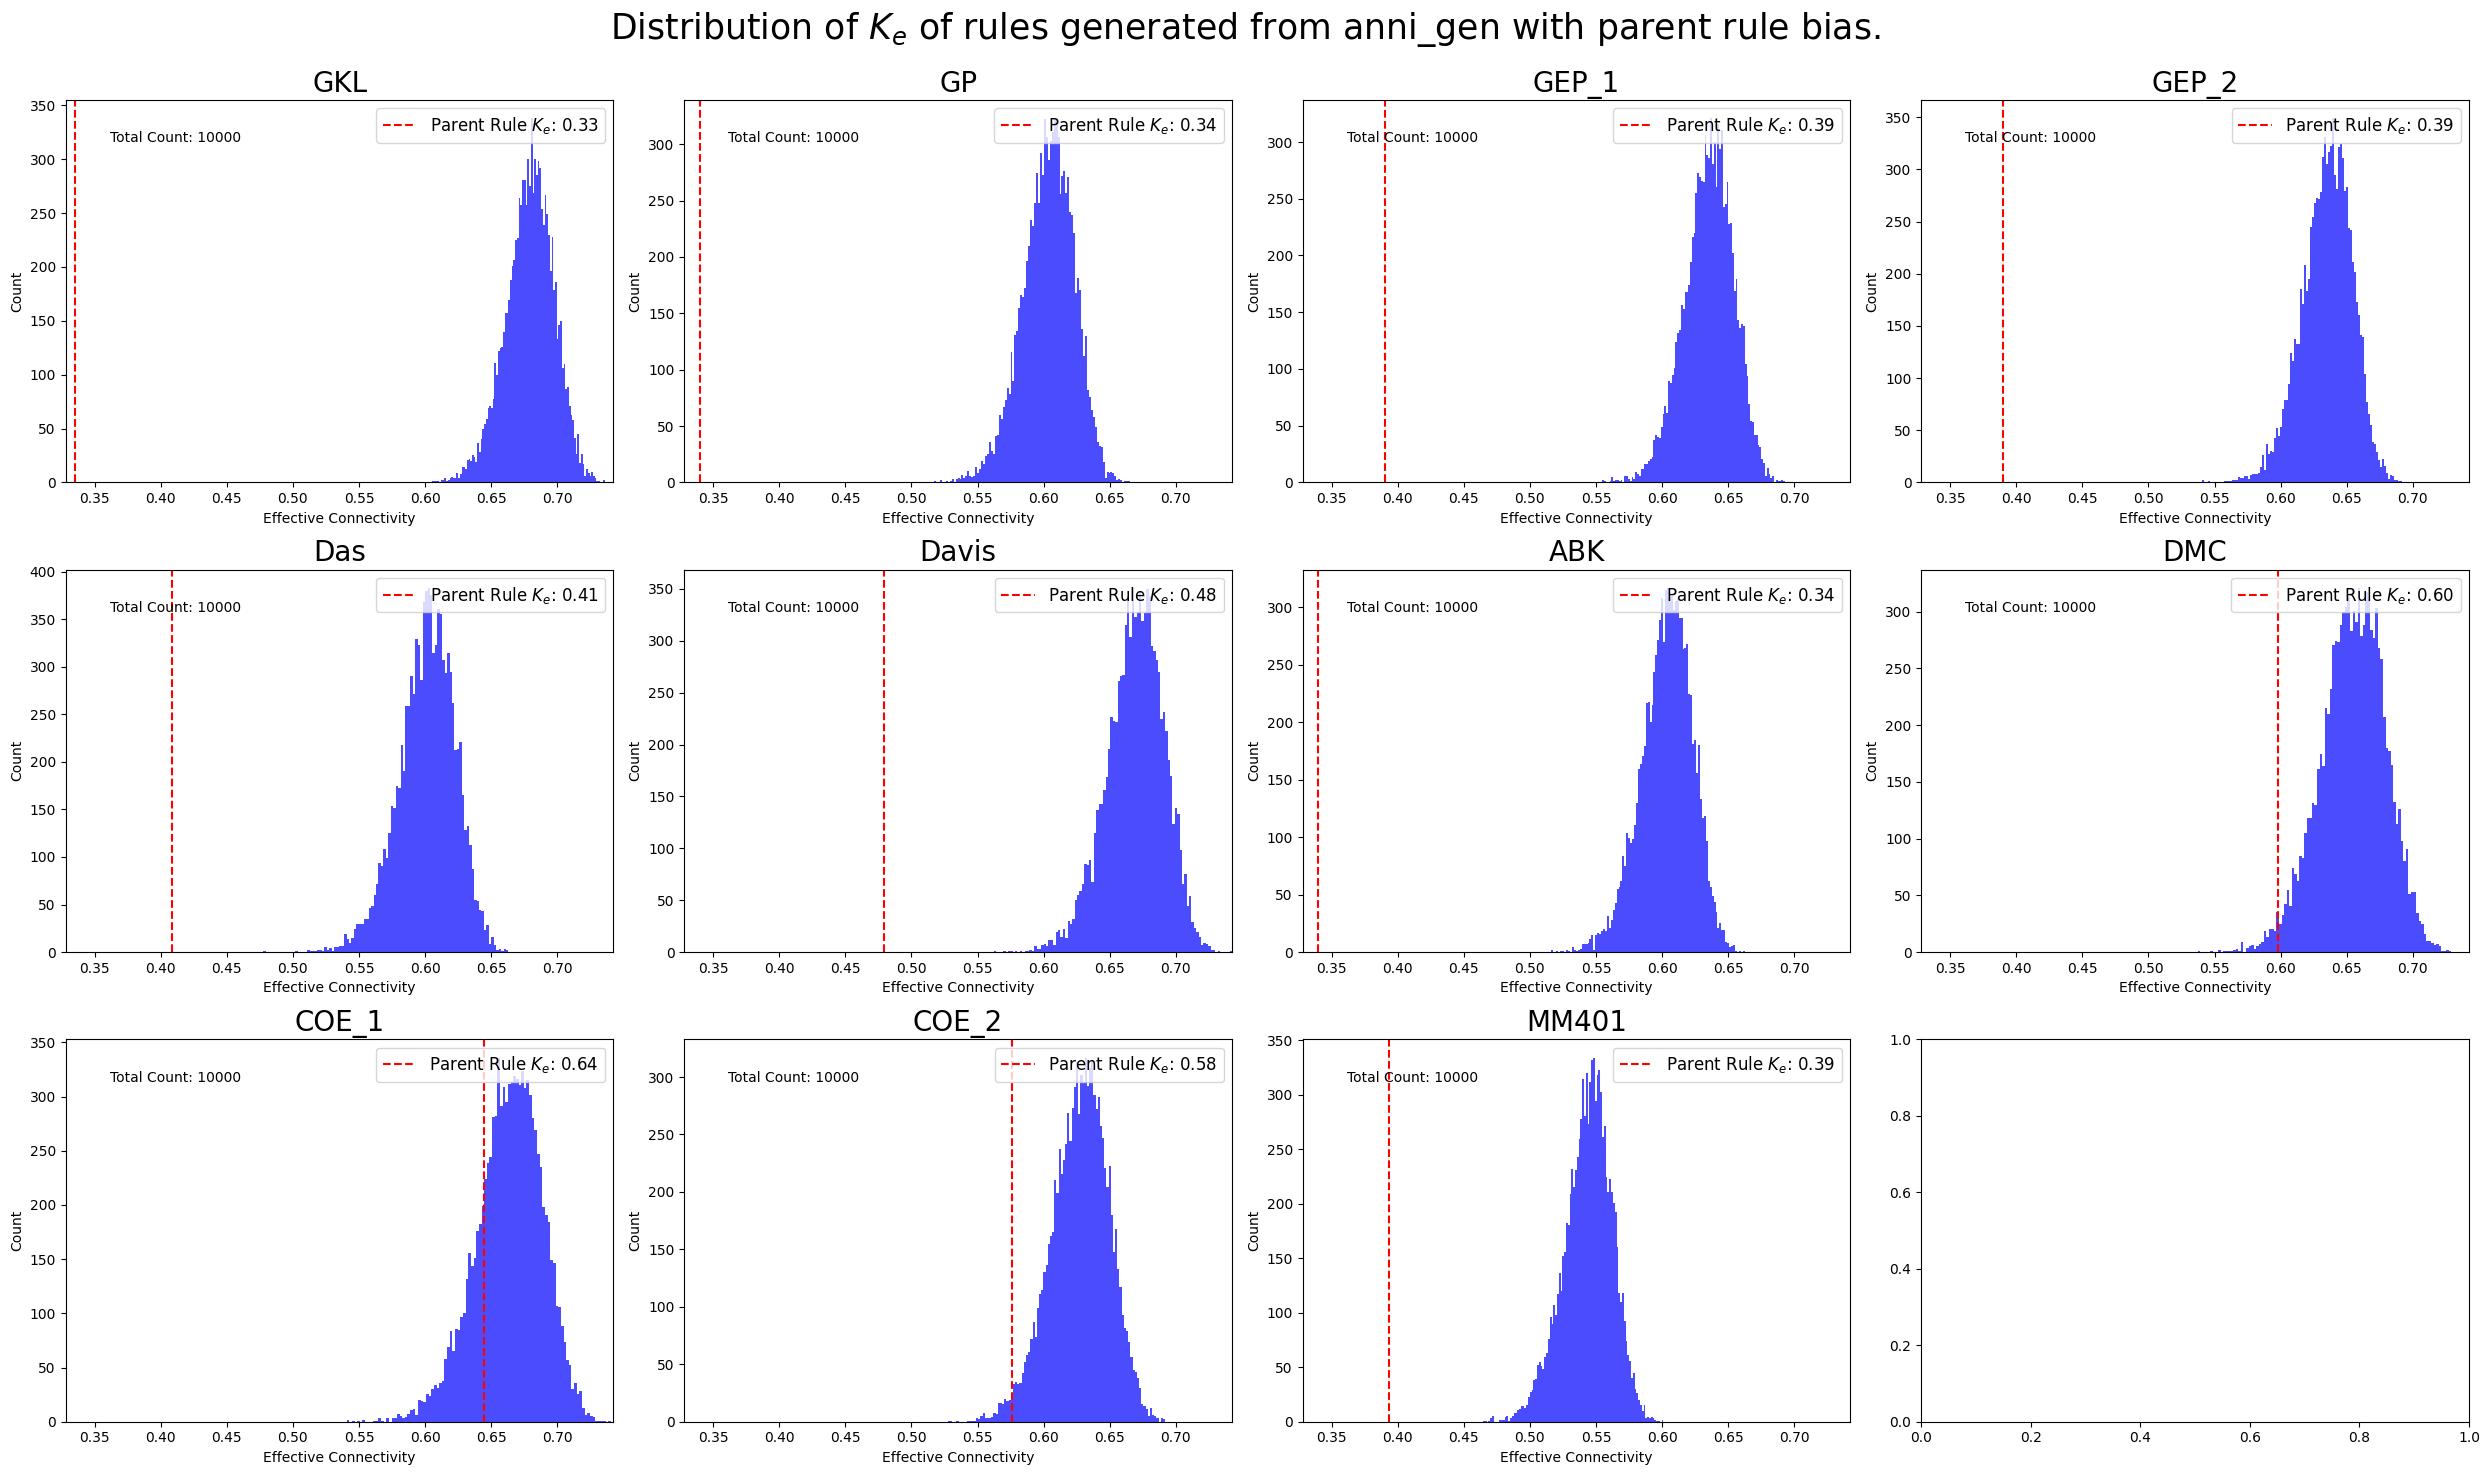

In [ ]:
rules = (
    "GKL",
    "GP",
    "GEP_1",
    "GEP_2",
    "Das",
    "Davis",
    "ABK",
    "DMC",
    "COE_1",
    "COE_2",
    "MM401",
)


generated_nodes = {}
limit = 10000
shuffle = False
save = True
value_type = "ke"


# parallelize the loop
def worker(item):
    """
    Worker function to be executed by each process.
    """
    parent_node = BooleanNode.from_output_list(automata_output_list[item])
    node = BooleanNode.from_partial_lut(annihilation_gen# create 8 histogram subplots for the 8 rules
plot_hist(
    generated_node_values={k: v[plot_value_type] for k, v in generated_nodes.items()},
    value_type=plot_value_type,
    title=title,
    save=save,
    filename=filename,
)
# Use ProcessPoolExecutor to parallelize the loop
with ProcessPoolExecutor() as executor:
    results = executor.map(worker, rules)

# Process results
for item, (nodes, bias, ke, count) in results:
    generated_nodes[item] = {"nodes": nodes, "bias": bias, "ke": ke, "count": count}


title = "Distribution of $K_e$ of rules generated from anni_gen with parent rule bias."
filename = (
    "Distribution of $K_e$ of rules generated from anni_gen with parent rule bias.png"
)

plot_hist(
    generated_node_values={k: v[value_type] for k, v in generated_nodes.items()},
    value_type=value_type,
    title=title,
    save=save,
    filename=filename,
)

#### Plotting Bias of generated nodes from anni_gen rules with with parent rule $K_e$

In [30]:
rules = (
    "GKL",
    "GP",
    "GEP_1",
    "GEP_2",
    "Das",
    "Davis",
    # "ABK",
    "DMC",
    # # "COE_1",
    # "COE_2",
    "MM401",
)


generated_nodes = {}
# limit = 10000
shuffle = False
save = True
plot_value_type = "bias"


# parallelize the loop
def worker(item):
    """
    Worker function to be executed by each process.
    """
    if item in ["GKL",  "GEP_1", "GEP_2", "Das", "MM401",]:
        shuffle = False
        limit = 10000
    elif item in ["Davis", "DMC", "COE_2", "GP", "ABK"]:
        shuffle = True
        limit = 1000
    else:
        return None
    parent_node = BooleanNode.from_output_list(automata_output_list[item])
    node = BooleanNode.from_partial_lut(annihilation_generation[item])
    generator = node.generate_with_required_effective_connectivity(
        effective_connectivity=parent_node.effective_connectivity(),
        epsilon=0.01,
        shuffle=shuffle,
    )

    return item, collect_data_from_generator(generator, limit=limit)


# Use ProcessPoolExecutor to parallelize the loop
with ProcessPoolExecutor() as executor:
    results = executor.map(worker, rules)

# Process results
for item, (nodes, bias, ke, count) in results:
    if item is not None:
        generated_nodes[item] = {"nodes": nodes, "bias": bias, "ke": ke, "count": count}


title = "Distribution of Bias of rules generated from anni_gen with parent rule $K_e$."
filename = (
    "Distribution of Bias of rules generated from anni_gen with parent rule Ke.png"
)


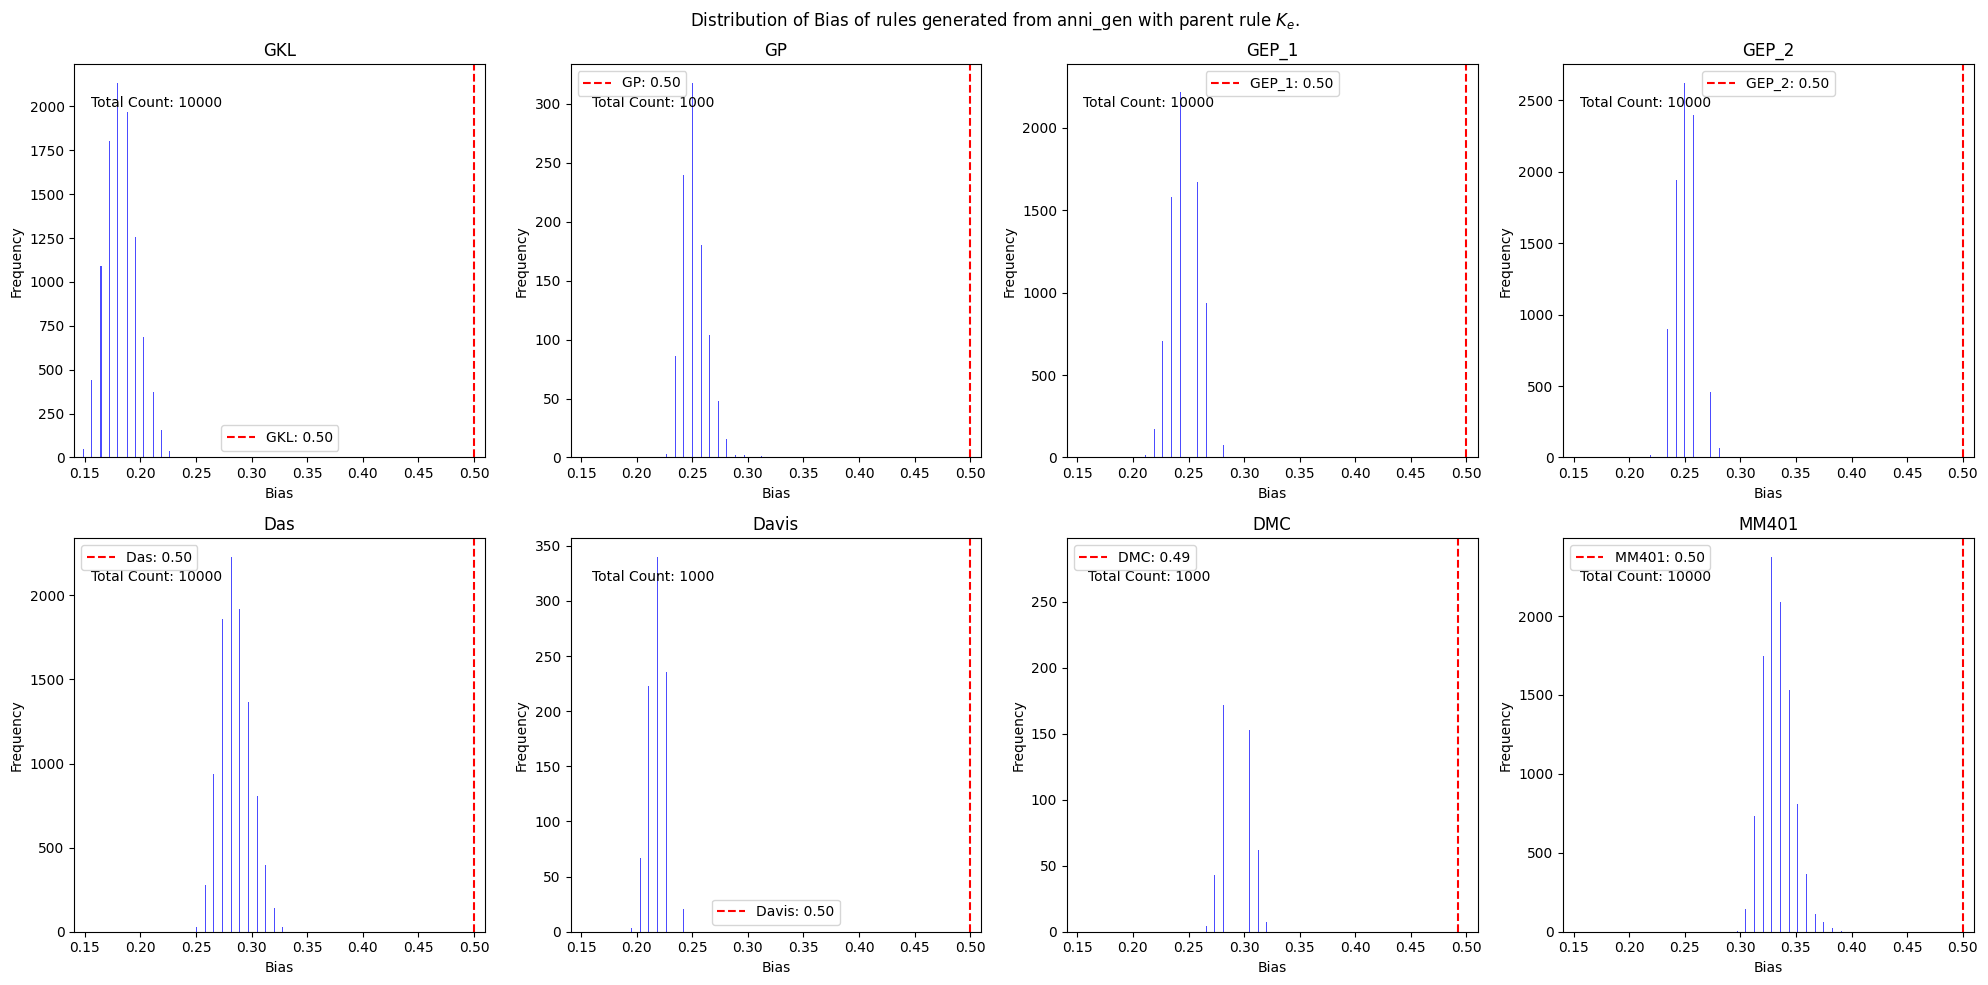

In [31]:
nodes ={k: v[plot_value_type] for k, v in generated_nodes.items()}
min_max, parent_rule_values = min_max_and_parent_rule_values(
    automata_output_list,
    nodes,
    value_type="bias",
    include_parent=True,
)
save = True
# plot nodes in 8 subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle(title)
for i, (item, node) in enumerate(nodes.items()):
    ax = axs[i // 4, i % 4]
    ax.hist(node, bins=100, color="blue", alpha=0.7)
    ax.set_xlim(min_max)
    ax.text(
        0.2,
        0.9,
        f"Total Count: {len(node)}",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
        fontsize=10,
    )
    ax.axvline(
        parent_rule_values[item],
        color="red",
        linestyle="--",
        label=f"{item}: {parent_rule_values[item]:.2f}",
    )
    ax.set_title(item)
    ax.set_xlabel("Bias")
    ax.set_ylabel("Frequency")
    ax.legend()
plt.tight_layout()
if save:
    plt.savefig(filename)
plt.show()
